In [1]:
import pvlib

import pandas as pd

import matplotlib.pyplot as plt

import pvlib.pvsystem as pvsystem

import datetime

import pytz

import os

import inspect

import pvlib


In [15]:
pd.Timestamp('2023-1-1 00:00', tz='Etc/GMT+2')

Timestamp('2023-01-01 00:00:00-0200', tz='Etc/GMT+2')

In [7]:
pvlib_abspath = os.path.dirname(os.path.abspath(inspect.getfile(pvlib)))

file_abspath = os.path.join(pvlib_abspath, 'data', '703165TY.csv')

tmy3_data, tmy3_metadata = pvlib.iotools.read_tmy3(file_abspath)



tmy3_metadata['Name'] = "Zuerich"
tmy3_metadata['State'] = "CH"
tmy3_metadata['TZ'] = +2
tmy3_metadata['latitude'] = 47.4
tmy3_metadata['longitude'] = 8.54
tmy3_metadata['altitude'] = 550

tmy3_metadata

{'USAF': 703165,
 'Name': 'Zuerich',
 'State': 'CH',
 'TZ': 2,
 'latitude': 47.4,
 'longitude': 8.54,
 'altitude': 550}

In [8]:
tmy3_data.index.tz


tmy3_data.loc[tmy3_data.index[0:3], ['GHI', 'DNI', 'AOD']]


,GHI,DNI,AOD
1997-01-01 01:00:00-09:00,0,0,0.051
1997-01-01 02:00:00-09:00,0,0,0.051
1997-01-01 03:00:00-09:00,0,0,0.051


Text(0, 0.5, '(degrees)')

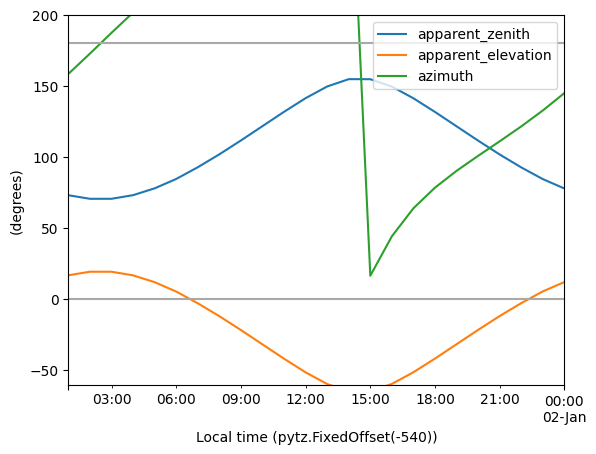

In [13]:
solar_position = pvlib.solarposition.get_solarposition(tmy3_data.index,
                                                       tmy3_metadata['latitude'],
                                                       tmy3_metadata['longitude'])


ax = solar_position.loc[solar_position.index[0:24], ['apparent_zenith', 'apparent_elevation', 'azimuth']].plot()

ax.legend(loc=1)

ax.axhline(0, color='darkgray')  # add 0 deg line for sunrise/sunset

ax.axhline(180, color='darkgray')  # add 180 deg line for azimuth at solar noon

ax.set_ylim(-60, 200)  # zoom in, but cuts off full azimuth range

ax.set_xlabel('Local time ({})'.format(solar_position.index.tz))

ax.set_ylabel('(degrees)')

Text(0, 0.5, '(degrees)')

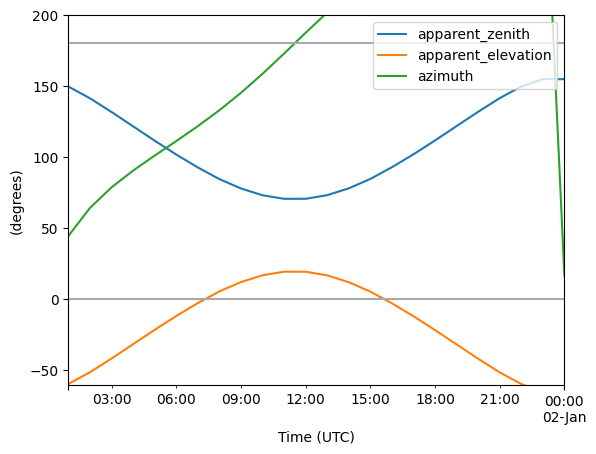

In [14]:
index = pd.date_range(start='1997-01-01 01:00', freq='1h', periods=24)

solar_position_notz = pvlib.solarposition.get_solarposition(index,
                                                            tmy3_metadata['latitude'],
                                                            tmy3_metadata['longitude'])


ax = solar_position_notz.loc[solar_position_notz.index[0:24], ['apparent_zenith', 'apparent_elevation', 'azimuth']].plot()

ax.legend(loc=1);

ax.axhline(0, color='darkgray');  # add 0 deg line for sunrise/sunset

ax.axhline(180, color='darkgray');  # add 180 deg line for azimuth at solar noon

ax.set_ylim(-60, 200);  # zoom in, but cuts off full azimuth range

ax.set_xlabel('Time (UTC)')

ax.set_ylabel('(degrees)')

Text(0, 0.5, '(degrees)')

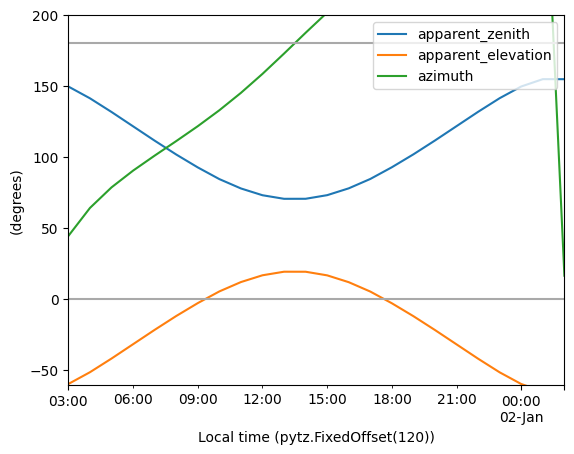

In [22]:


fixed_tz = pytz.FixedOffset(tmy3_metadata['TZ'] * 60)

solar_position_hack = solar_position_notz.tz_localize('UTC').tz_convert(fixed_tz)

solar_position_hack.index

ax = solar_position_hack.loc[solar_position_hack.index[0:24], ['apparent_zenith', 'apparent_elevation', 'azimuth']].plot()

ax.legend(loc=1)

ax.axhline(0, color='darkgray');  # add 0 deg line for sunrise/sunset

ax.axhline(180, color='darkgray');  # add 180 deg line for azimuth at solar noon

ax.set_ylim(-60, 200);  # zoom in, but cuts off full azimuth range

ax.set_xlabel('Local time ({})'.format(solar_position_hack.index.tz))

ax.set_ylabel('(degrees)')

# print(ax)